<a href="https://colab.research.google.com/github/ohjisu320/study_AIs/blob/main/docs/quests/NLPs/wordcloud_regex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글폰트설정

In [1]:
# !apt-get -y install fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## read excel file with sheets

In [2]:
import pandas as pd
df_OWG = pd.read_excel('OneWord_Game.xlsx', sheet_name=None)

In [3]:
df_sheets = []
for sheet_name, df in df_OWG.items() :
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)

2월, <class 'pandas.core.frame.DataFrame'>
1월, <class 'pandas.core.frame.DataFrame'>
12월, <class 'pandas.core.frame.DataFrame'>


3

## 데이터 전처리

In [4]:
df_sheets[0].columns

Index([     '            ',        'Unnamed: 1', 2024-02-15 00:00:00,
       2024-02-14 00:00:00, 2024-02-13 00:00:00, 2024-02-07 00:00:00,
       2024-02-06 00:00:00, 2024-02-05 00:00:00, 2024-02-02 00:00:00,
       2024-02-01 00:00:00],
      dtype='object')

In [5]:
# column 이름 변환
for x in [0,1,2]:
  df_sheets[x].rename(columns={'            ': 'name'}, inplace=True)
  pass

df_sheets[2].rename(columns={'      ': 'name'}, inplace=True)

In [6]:
# 내 이름만 빼기
contents_list = []
for x in range(len(df_sheets)) :
  condition = 'name=="오지수"'
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
  contents_list.append(contents)
  pass


<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]


In [19]:
# 조사 제외
import re
text_list = []
for x in range(len(contents_list)) :
  text = ' '.join(contents_list[x])
  patterns = '(때문에 | 통해 |하다|한다|이다|의 |\\n|를 |\.|로 |은 |을 |에 | 수 |이 |할 |나 |\(|\)|\-)'
  text_regex = re.sub(pattern=patterns,repl=' ',string=text)
  text_list.append(text_regex)
text_list

['regular expression Encoding 범주형 데이터 숫자형 데이터 변환하는 과정 말    과정 군집화 머신러닝 알고리즘 적용 때  컴퓨터가 데이터 더 잘 이해하고 처리 수 있게 하기 위해 필요    강화학습 reinforcement learning  문제와 정답 알려주지 않고, 환경 던져 준 후 시행착오 통해 보상 최대화하는 방향으 학습하는 방법 말    알파고가 강화학습 대표적인 예로, 복잡한 환경에서 최적 결정 내리는 문제 해결 수 있다  데이터 전처리 결측치 이상치 분석 적합한 형태 가공하고 정제하는 과정 말   잘못된 데이터가 포함되어 있으면 분석 결과 정확성 떨어질 있기  데이터 전처리 과정 필요   PDA Predictive Data Analysis  데이터 간 관계 학습한 것 토대 수식화, 일반화해서 새로운 데이터 대해 예측하는 방식 데이터 분석 말   새로운 데이터 다음 상황 예측해서 비지니스 전략 수립하는 등 의사결정 내리기 위해 사용   기대빈도수 expected frequencies  어떤 사건 일어날 것으 예상되는 빈도수 의미   어떤 사건 발생 빈도수, 확률 예측하기 위해 구해진다   상관계수 correlation coefficient  두 연속형 변수간 상관관계 분석한 수치   양 상관관계 띄는지, 음 상관관계 띄는지, 아니면 상관관계가 없는지 판별해서 변수 간 관계 해석 수 있다  산점도 scatter plot  2개 연속형 변수 이용해 점 찍어 만든 통계 그래프   연속형 변수 간 상관관계 파악하거 데이터 분포 확인하기 위해 사용  ',
 "pandas    index series dataframe index 추출해주는 메소드   행 식별해서 데이터 분석, 시각화하기 위해 사용   Series index 나타내고 value 하나 열 담아 나타내는 데이터타입   단일데이터 표 형식으 담아, 다른 Series와 연산, 결측치 확인, 이상치 확인 등 리스트보다 더 많 분석  수 있다   자바스크립트   오브젝트 파이썬에서

In [21]:
# 다 합치기(시트별 스트링)
text = ''.join(text_list)
text

"regular expression Encoding 범주형 데이터 숫자형 데이터 변환하는 과정 말    과정 군집화 머신러닝 알고리즘 적용 때  컴퓨터가 데이터 더 잘 이해하고 처리 수 있게 하기 위해 필요    강화학습 reinforcement learning  문제와 정답 알려주지 않고, 환경 던져 준 후 시행착오 통해 보상 최대화하는 방향으 학습하는 방법 말    알파고가 강화학습 대표적인 예로, 복잡한 환경에서 최적 결정 내리는 문제 해결 수 있다  데이터 전처리 결측치 이상치 분석 적합한 형태 가공하고 정제하는 과정 말   잘못된 데이터가 포함되어 있으면 분석 결과 정확성 떨어질 있기  데이터 전처리 과정 필요   PDA Predictive Data Analysis  데이터 간 관계 학습한 것 토대 수식화, 일반화해서 새로운 데이터 대해 예측하는 방식 데이터 분석 말   새로운 데이터 다음 상황 예측해서 비지니스 전략 수립하는 등 의사결정 내리기 위해 사용   기대빈도수 expected frequencies  어떤 사건 일어날 것으 예상되는 빈도수 의미   어떤 사건 발생 빈도수, 확률 예측하기 위해 구해진다   상관계수 correlation coefficient  두 연속형 변수간 상관관계 분석한 수치   양 상관관계 띄는지, 음 상관관계 띄는지, 아니면 상관관계가 없는지 판별해서 변수 간 관계 해석 수 있다  산점도 scatter plot  2개 연속형 변수 이용해 점 찍어 만든 통계 그래프   연속형 변수 간 상관관계 파악하거 데이터 분포 확인하기 위해 사용  pandas    index series dataframe index 추출해주는 메소드   행 식별해서 데이터 분석, 시각화하기 위해 사용   Series index 나타내고 value 하나 열 담아 나타내는 데이터타입   단일데이터 표 형식으 담아, 다른 Series와 연산, 결측치 확인, 이상치 확인 등 리스트보다 더 많 분석  수 있다   자바스크립트   오브젝트 파이썬에서 dicti

In [22]:
text_split = text_list[0].split()
text_split[:2], len(text_split)

(['regular', 'expression'], 181)

In [23]:
from collections import Counter
text_split_count = Counter(text_split)
# text_split_count

In [24]:
series = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [25]:
# !pip install soynlp


## wordcloud 만들기

In [26]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

In [27]:
wordCloud.generate_from_frequencies(series)

In [28]:
wordCloud.words_

{'데이터': 1.0,
 '위해': 0.4,
 '과정': 0.4,
 '말': 0.4,
 '상관관계': 0.4,
 '수': 0.3,
 '간': 0.3,
 '분석': 0.3,
 '변수': 0.3,
 '연속형': 0.3,
 '사용': 0.2,
 '전처리': 0.2,
 '있다': 0.2,
 '띄는지,': 0.2,
 '어떤': 0.2,
 '사건': 0.2,
 '새로운': 0.2,
 '강화학습': 0.2,
 '관계': 0.2,
 '필요': 0.2,
 '기대빈도수': 0.1,
 'regular': 0.1,
 'expected': 0.1,
 '일어날': 0.1,
 '것으': 0.1,
 '예상되는': 0.1,
 'frequencies': 0.1,
 '등': 0.1,
 '내리기': 0.1,
 '의사결정': 0.1}

### 완성!

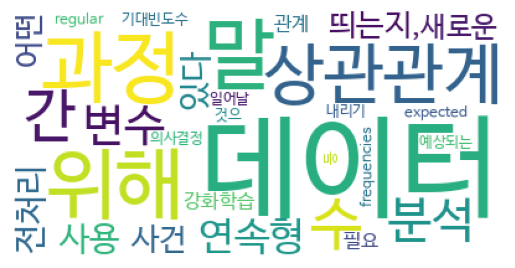

In [29]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()